# Household Hot Water System Simulation (HHWSS)

In [1]:
import numpy as np

### Variable Parameters / Constants

In [2]:
n_rooms_r, n_rooms_c = 2, 3
resolution = 5

interior_wall_thickness = 4.5  # inches, 3.5in 2x4 + 2*0.5in drywall either side
plumbing_wall_thickness = 6.5  # inches, 5.5in 2x6 + "                         "

### Generating Raw Grid Structure

In [3]:
N, M = n_rooms_r * (resolution + 1) + 1, n_rooms_c * (resolution + 1) + 1
raw_grid = graphs.GridGraph([N, M])
# raw_grid.plot(vertex_labels=False)

### Defining Exterior Boundary

In [4]:
exterior = np.asarray([[
    [(i, 0), (i, M - 1), (0, j), (N - 1, j)] 
    for i in range(N)] 
    for j in range(M)]).reshape([-1, 2]).tolist()
exterior_vertices = set([tuple(_) for _ in exterior])
# raw_grid.subgraph(vertices=exterior_vertices).plot(vertex_labels=False)

### Generating Raw Space For Rooms

In [5]:
rooms = np.asarray([[[[(i, j) 
            for i in range(n_i * (resolution + 1) + 1, (n_i + 1) * (resolution + 1))] 
           for j in range(n_j * (resolution + 1) + 1, (n_j + 1) * (resolution + 1))] 
          for n_i in range(n_rooms_r)] 
         for n_j in range(n_rooms_c)]).reshape([-1, 2]).tolist()
room_vertices = set([tuple(_) for _ in rooms])

### "Insert" Rooms Into Our House

In [6]:
raw_grid.delete_vertices(room_vertices)

In [7]:
front_door = raw_grid.subgraph(vertices=exterior_vertices).random_vertex()
raw_grid.delete_vertex(front_door)
exterior_vertices.remove(front_door)

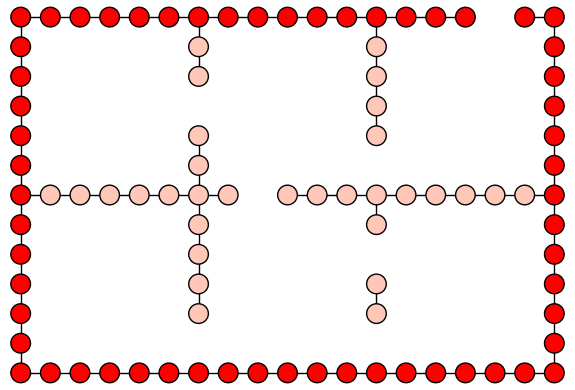

In [8]:
contains_cycle = lambda g: len(g.cycle_basis()) != 0
not_in_exterior = lambda v: v not in exterior_vertices
allowable_interior_doors = raw_grid.random_vertex_iterator(vertices=None, degree=2, vertex_property=not_in_exterior)

for v in allowable_interior_doors:
    raw_grid.delete_vertex(v)
    if not contains_cycle(raw_grid):
        break

In [ ]:
raw_grid.plot(vertex_labels=False, vertex_colors={'grey': exterior_vertices})